# DACON 14회 금융문자분석 경진대회
### 작성자 : SOMJANG (장동현)
### 최종 순위 : 59 / 398 (SCORE 0.98228)
### 후기 : https://bit.ly/3bpOurz

### 사용 형태소 분석기 : Okt
### 모델 : LSTM

## 형태소 분석에 필요한 Konlpy와 Mecab 라이브러리 설치

In [0]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 20), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [0]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [0]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [0]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [0]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 227kB/s 
     |████████████████████████████████| 2.3MB 42.6MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-02-11 10:37:21--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

## 데이터가 있는 Google Drive 마운트하기

In [0]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
cd /content/mnt/My Drive/Colab Notebooks/금융문자분석

/content/mnt/My Drive/Colab Notebooks/금융문자분석


## pandas의 pd.read_csv로 데이터 읽어오기

In [0]:
import pandas as pd
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("public_test.csv")

## 정규식과 replace 메소드를 활용하여 데이터 속 문자에서 XXX를 제거하고 특수문자 제거하기

In [0]:
from tqdm import tqdm
train_data_text = list(train_data['text'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(train_data_text[i].replace('XXX', ''))
train_data['clear_text'] = train_clear_text

100%|██████████| 295945/295945 [00:00<00:00, 656560.43it/s]


In [0]:
import re

train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  train_clear_text2.append(temp)
train_data['clear_text2'] = train_clear_text2
train_data

,id,year_month,text,smishing,clear_text,clear_text2
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산팀장입니다.행복한주말되세요,은행성산팀장입니다행복한주말되세요
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요은행 진월동VIP라운지 올림,오늘도많이웃으시는하루시작하세요은행 진월동VIP라운지 올림
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님. 은행입니다.금일 납부하셔야 할 금액은 153600원 입니다.감...,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합니...
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에 감사드...,고객님안녕하세요은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에 감사드...
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득입니다.올 한해 더 많이행복한 한해되시길바랍니다,1월은 새로움이 가득입니다올 한해 더 많이행복한 한해되시길바랍니다
...,...,...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0,고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으로 신...,고객님열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으로 신년...
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0,고객님실버웰빙신탁이 만기도래 예정입니다.남양주지점,고객님실버웰빙신탁이 만기도래 예정입니다남양주지점
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0,한해동안 은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 가족의...,한해동안 은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 가족의...
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,1228금예금및 적금 만기입니다예금은 시간내서 내점하시고 적금은 1년 자동연장되니 ...


In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

100%|██████████| 1626/1626 [00:00<00:00, 260104.44it/s]


In [0]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [0]:
train_data

,id,year_month,text,smishing,clear_text,clear_text2
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산팀장입니다.행복한주말되세요,은행성산팀장입니다행복한주말되세요
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요은행 진월동VIP라운지 올림,오늘도많이웃으시는하루시작하세요은행 진월동VIP라운지 올림
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님. 은행입니다.금일 납부하셔야 할 금액은 153600원 입니다.감...,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합니...
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에 감사드...,고객님안녕하세요은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에 감사드...
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득입니다.올 한해 더 많이행복한 한해되시길바랍니다,1월은 새로움이 가득입니다올 한해 더 많이행복한 한해되시길바랍니다
...,...,...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0,고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으로 신...,고객님열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으로 신년...
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0,고객님실버웰빙신탁이 만기도래 예정입니다.남양주지점,고객님실버웰빙신탁이 만기도래 예정입니다남양주지점
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0,한해동안 은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 가족의...,한해동안 은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 가족의...
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,1228금예금및 적금 만기입니다예금은 시간내서 내점하시고 적금은 1년 자동연장되니 ...


## 데이터 라벨 분포 확인해보기

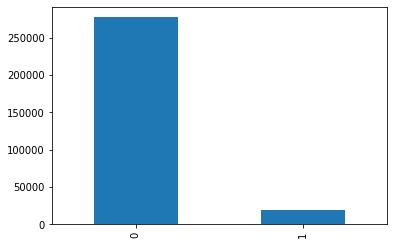

In [0]:
train_data['smishing'].value_counts().plot(kind='bar')

In [0]:
print(train_data.groupby('smishing').size().reset_index(name='count'))

   smishing   count
0         0  277242
1         1   18703


정상인 문자와 스미싱 문자의 비율이 약 9:1인 것을 알 수 있습니다.

여기서 저는 정상인 문자와 스미싱 문자의 비율이 1 : 1이면

한 쪽에 편향되지 않고 잘 학습이 되겠지? 라고 생각해보았습니다.

스미싱 문자는 총 18,703개가 존재하므로 

정상문자에서도 18,703개만 추출하여 보기로했습니다.

추출 조건은 데이터 속 XXX를 제거하고 특수문자를 제거한 문자들에서

길이가 긴 순서대로 18,703개를 추출하는 것으로 정했습니다.

In [0]:
clear_text2 = list(train_data['clear_text2'])

text_lens = []

for i in tqdm(range(len(clear_text2))):
  text_lens.append(len(clear_text2[i]))

train_data['len'] = text_lens

100%|██████████| 295945/295945 [00:00<00:00, 1535227.09it/s]


먼저 특수문자와 XXX를 지운 문자에서 각각의 길이를 구하여

len이라는 새로운 column이름을 가진 열을 하나 추가해 줍니다.

In [0]:
normal_df = train_data[train_data['smishing'] == 0]
normal_df = normal_df.sort_values(by=['len'], axis=0, ascending=False)

normal_df = normal_df.iloc[0:18703]
normal_df

,id,year_month,text,smishing,clear_text,clear_text2,len
259399,294349,2018-08,XXX 고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 22...,0,고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 2247....,고객님안녕하십니까 주요증시전거래일 기준 KOSPI 224788...,1127
258037,292830,2018-08,XXX 고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 휴장...,0,고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 휴장 K...,고객님안녕하십니까 주요증시전거래일 기준 KOSPI 휴장 KO...,1124
192738,219895,2018-01,주요 증시 전거래일 기준 KOSPI 2503.73 7.31 0....,0,주요 증시 전거래일 기준 KOSPI 2503.73 7.31 0....,주요 증시 전거래일 기준 KOSPI 250373 731 029 ...,1122
195135,222447,2018-01,안녕하세요? XXX 고객님주요 증시 전거래일 기준 KOSPI ...,0,안녕하세요? 고객님주요 증시 전거래일 기준 KOSPI 2...,안녕하세요 고객님주요 증시 전거래일 기준 KOSPI 25...,1120
289463,329237,2018-11,XXX 고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 20...,0,고객님안녕하십니까? 주요증시전거래일 기준 KOSPI 2096....,고객님안녕하십니까 주요증시전거래일 기준 KOSPI 209600...,1120
...,...,...,...,...,...,...,...
289335,329088,2018-11,안녕하세요 고객님!XXX은행 양평지점 XXX과장입니다.항상 저희 XXX은행을 애용해...,0,안녕하세요 고객님!은행 양평지점 과장입니다.항상 저희 은행을 애용해 주셔서 감사드립...,안녕하세요 고객님은행 양평지점 과장입니다항상 저희 은행을 애용해 주셔서 감사드립니다...,333
263169,298624,2018-09,XXX 고객님 안녕하세요.항상 저희 XXX은행을 거래해 주셔서 감사합니다. 저는 고...,0,고객님 안녕하세요.항상 저희 은행을 거래해 주셔서 감사합니다. 저는 고객님의 전담...,고객님 안녕하세요항상 저희 은행을 거래해 주셔서 감사합니다 저는 고객님의 전담직원...,333
281816,320429,2018-11,XXX 고객님 안녕하세요.XXX은행 XXX Star LXXX 전담직원 XXX입니다....,0,고객님 안녕하세요.은행 Star L 전담직원 입니다.고객님의 전담직원으로 소중한...,고객님 안녕하세요은행 Star L 전담직원 입니다고객님의 전담직원으로 소중한 인...,333
131525,151551,2017-08,(광고) XXX고객님을 위한 청약상품 안내XXX고객님! 소중한 내 집 마련을 위한 ...,0,(광고) 고객님을 위한 청약상품 안내고객님! 소중한 내 집 마련을 위한 첫 발걸음주...,광고 고객님을 위한 청약상품 안내고객님 소중한 내 집 마련을 위한 첫 발걸음주택청약...,333


그 다음 smishing이 0인 데이터(정상문자)만 선택한 다음
그 데이터를 len 을 기준으로 내림차순 정렬을 한 후 위에서부터 18,703개만 선택하여 추출하였습니다.

In [0]:
smishing_df = train_data[train_data['smishing'] == 1]
smishing_df

,id,year_month,text,smishing,clear_text,clear_text2,len
9,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...,822
23,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...,343
31,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...,853
40,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...,876
50,58,2017-01,(광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...,1,(광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...,광고한국citi bank 나의 대출한도와 금리는 대출때문에 고민하고 있다거나 높은이...,854
...,...,...,...,...,...,...,...
295927,336357,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...,856
295932,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...,963
295934,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...,849
295936,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...,410


그 다음 smishing이 1인 데이터(스미싱문자)만 모았습니다.

In [0]:
new_train_data = pd.concat([normal_df, smishing_df])
new_train_data = new_train_data.sort_values(by=['id'], axis=0, ascending=True)
del new_train_data['len']
new_train_data

,id,year_month,text,smishing,clear_text,clear_text2
9,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
20,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
23,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
31,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
40,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...
295932,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
295934,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
295936,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
295937,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


스미싱문자만 모은 dataframe 그리고 정상 문자 중 18,703개만 모은 dataframe을 concat method를 활용하여 하나로 합친 다음

데이터가 어느정도 섞일 수 있도록

id 값을 기준으로 오름차순으로 정렬해주었습니다.

## 설치한 라이브러리를 import 해줍니다

In [0]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt = Okt()
mecab = Mecab()

## 불용어 설정

In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

## okt의 morphs를 활용하여 토큰화 실시
- stem = True
- 불용어 처리
- 토큰화한 단어 중 길이가 2이상인 단어만 남겨둠

In [0]:
from tqdm import tqdm
X_train = []

text = list(train_data['clear_text2'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = okt.morphs(text[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 295945/295945 [1:20:57<00:00, 60.92it/s]


In [0]:
X_test = []

text = list(test_data['clear_text2'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = okt.morphs(text[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:38<00:00, 34.96it/s]


In [0]:
print(X_train[:3])

[['은행', '성산', '이다', '행복하다', '되다'], ['오늘', '많이', '웃다', '하루', '시작', '은행', '월동', 'VIP', '라운지', '올리다'], ['안녕하십니까', '고객', '은행', '이다', '금일', '납부', '금액', '153600원', '이다', '감사하다', '새해', '많이', '받다', '은행', '옥포', '올리다']]


In [0]:
print(X_test[:3])

[['고객', '안녕하다', '새롭다', '시작', '행복', '가득하다', '기원', '지난주', '글로벌', '증시', '파월', '밉다', '의장', '통화정책', '대해', '완화', '태도', '변화', '보이다', '주초', '투자', '심리', '개선', '이어지다', '크다', '상승', '마감', '더불다', '밉다', '차관', '무역', '협상', '진행', '되다', '점도', '긍정', '이다', '달러', '환율', '주간', '75원', '하락', '가운데', '외국인', '투자자', '국내', '증시', '매수', '규모', '8천억', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '금주', '시장', '미국', '금융', '실적', '발표', '시작', '본격', '실적', '시즌', '진입', '되다', '지난주', '애플', '삼성', '전자', '주요', '기업', '1분', '실적', '전망', '하향', '조정', '있다', '참고', '올해', '글로벌', '성장', '둔화', '조속', '에서', '기업', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '감사하다', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '기본', '대출', '이자', '조합', '에서', '납부', '2018년', '12월', '25일', '부로', '종료', '되어다', '따라서', '2019년', '1월', '25일', '부터', '매월', '25일', '중도', '대출', '이자', '계약', '께서', '직접', '납부', '되다', '방법', '안내', '자동', '이체', '등록',

## Keras Preprecessing의 Tokenizer를 활용하여 정수인코딩 실시
- max_words = 35000

In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [0]:
print(X_train[:3])

[[1, 7255, 8, 14, 4], [33, 113, 295, 18, 111, 1, 3777, 221, 642, 5], [157, 2, 1, 8, 670, 299, 67, 34952, 8, 16, 202, 113, 28, 1, 1329, 5]]


In [0]:
print(X_test[:3])

[[2, 43, 168, 111, 66, 54, 134, 1373, 970, 254, 3321, 538, 2861, 2655, 194, 518, 4722, 1429, 501, 14369, 385, 794, 771, 1369, 231, 142, 305, 1231, 538, 25100, 612, 1715, 55, 4, 4573, 1106, 8, 937, 335, 1633, 286, 1154, 916, 2490, 652, 254, 1197, 2177, 3424, 1234, 771, 4, 4573, 2368, 558, 376, 6, 1587, 381, 493, 20, 449, 1153, 111, 1222, 449, 2281, 1493, 4, 1373, 3136, 2124, 1173, 448, 206, 1500, 449, 945, 3608, 915, 6, 526, 494, 970, 2532, 1070, 5550, 22, 206, 316, 1391, 207, 6, 2781, 376, 6, 501, 2738, 159, 3758, 3739, 2580, 3593, 5806, 535, 56, 6, 1052, 116, 84, 204, 27, 224, 4, 16, 1, 1842, 70, 5], [4626, 57, 1, 4335, 7, 7395, 698, 10, 87, 7114, 22, 299, 214, 470, 1264, 1208, 1287, 56, 1099, 857, 474, 1264, 148, 415, 1264, 467, 10, 87, 968, 158, 390, 299, 4, 78, 57, 437, 395, 216, 1, 264, 542, 128, 576, 405, 262, 46, 139, 10, 156, 10, 87, 437, 299, 156, 437, 395, 216, 1160, 352, 265, 762, 976, 1142, 437, 395, 216, 437, 395, 8455, 2, 35, 591, 1, 264, 128, 10, 87, 299, 10, 87, 415, 12

문자의 최대 길이 : 315
문자의 평균 길이 :  41.002662656912605


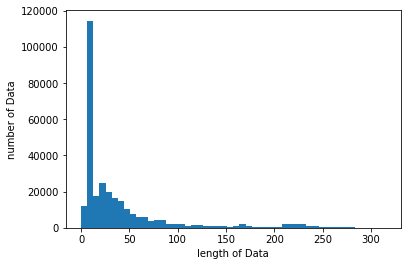

In [0]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  287
문자의 평균 길이 :  70.28228782287823


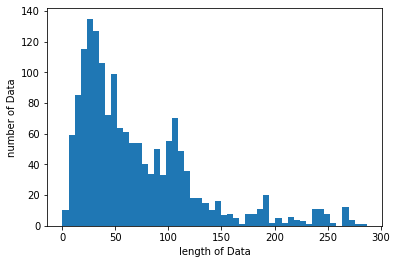

In [0]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

## 라벨 데이터 One-Hot Encoding 실시
- label 이 1일 경우 [0, 1]
- label 이 0일 경우 [1, 0]

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

## 모든 데이터의 길이를 315로 동일하게 맞춰줌
- 길이가 짧은 데이터는 모자란 길이를 0으로 채워줍니다.

In [0]:
max_len = 315 # 전체 데이터의 길이를 315로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

## Embedding Layer + LSTM 레이어 모델 학습
- optimizer = adam

In [0]:
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/2





33665/33665 [==============================] - 547s 16ms/step - loss: 0.0225 - acc: 0.9931 - val_loss: 0.0089 - val_acc: 0.9972
Epoch 2/2
33665/33665 [==============================] - 544s 16ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 0.0049 - val_acc: 0.9987


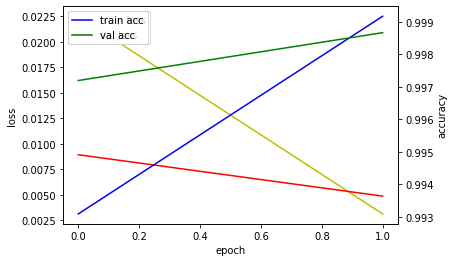

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_14.h5")

## 제출파일 만들기

In [0]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_14.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_14.csv")

,id,smishing
0,340000,0.000013
1,340001,0.000363
2,340002,0.000008
3,340003,0.000015
4,340004,0.000007
...,...,...
1621,341621,0.000052
1622,341622,0.000012
1623,341623,0.000004
1624,341624,0.000052
